Import libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt
import os
from iob import style_transfer, utils

In [2]:
# Run this once only
%cd ../

d:\dev\project\Neural-Style-Transfer


Get input images

torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])


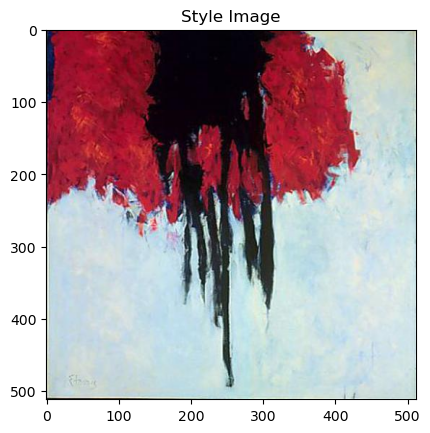

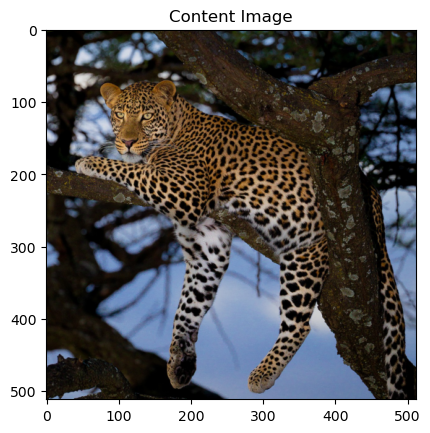

In [3]:
content_path = os.path.join(os.getcwd(), 'content_images')
style_path = os.path.join(os.getcwd(), 'style_images')
output_path = os.path.join(os.getcwd(), 'output_images')

content_img_name = "leopard.jpg"
style_img_name = "abstract_art_2.jpg"
ctin = content_img_name.split('.')[0]
stin = style_img_name.split('.')[0]

content_img_path = os.path.join(content_path, content_img_name)
style_img_path = os.path.join(style_path, style_img_name)

# Resize the images
# imsize = 512

content_img = utils.image_loader(content_img_path)
style_img = utils.image_loader(style_img_path)

print(style_img.size(), content_img.size())
# assert style_img.size() == content_img.size(), \
#     "Style and content images must be the same size"

plt.figure()
utils.imshow(style_img, title='Style Image')

plt.figure()
utils.imshow(content_img, title='Content Image')

In [4]:
content_img_path

'd:\\dev\\project\\Neural-Style-Transfer\\content_images\\leopard.jpg'

Define model and run

In [5]:
model = style_transfer.StyleTransfer()

output = model.run_style_transfer(content_img_path=content_img_path, style_img_path=style_img_path, num_steps=600, lr = 0.05, return_tensor=True, preserve_color=False, beta = 1e5)

d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 3, 512, 512]) torch.Size([1, 3, 512, 512])


d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
d:\dev\project\Neural-Style-Transfer\src\iob\layers.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1).to(device)


Optimizing...
Step 50: Style Loss: 0.002668 Content Loss: 6.692663
Step 100: Style Loss: 0.001484 Content Loss: 14.733452
Step 150: Style Loss: 0.001170 Content Loss: 15.138800
Step 200: Style Loss: 0.000766 Content Loss: 16.793659
Step 250: Style Loss: 0.000401 Content Loss: 19.453217
Step 300: Style Loss: 0.000276 Content Loss: 15.171920
Step 350: Style Loss: 0.000209 Content Loss: 13.766713
Step 400: Style Loss: 0.000182 Content Loss: 12.585243
Step 450: Style Loss: 0.000165 Content Loss: 12.124617
Step 500: Style Loss: 0.000156 Content Loss: 11.748987
Step 550: Style Loss: 0.000150 Content Loss: 11.506830
Step 600: Style Loss: 0.000145 Content Loss: 11.337916


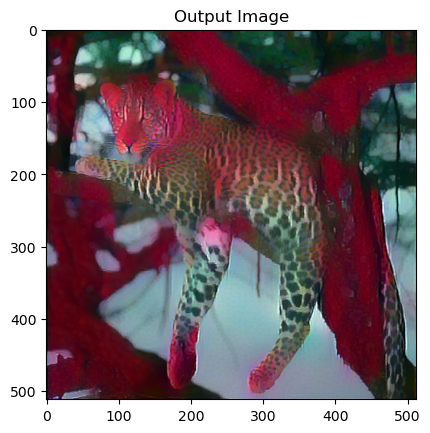

In [6]:
plt.figure()
utils.imshow(output, title='Output Image')
plt.ioff()
plt.show()

In [7]:
content_img.shape, output.shape

(torch.Size([1, 3, 512, 512]), torch.Size([1, 3, 512, 512]))

Save output as jpg

In [8]:
output_img = utils.image_unloader(output)
output_img.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}.jpg'))

Save output with color preservation

In [9]:
original_color_output = utils.preserve_color_lab(content_img, output)
original_color_output = utils.image_unloader(original_color_output)
original_color_output.save(os.path.join(output_path, f'{ctin}_styled_as_{stin}_preserve_color.jpg'))
# plt.figure()
# utils.imshow(original_color_output, title='Output Image')
# plt.ioff()
# plt.show()